# Data 1202 Final Project
## By
## Hisham Mohammed Afzal - 100905717
## Jinil Patel - 100895175
## Nidhi Atulbhai Patel - 100949362
## Khushali Shah - 100948520
## Chigozirim Dike - 100860785

### Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('dataset.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())


                                                hash  millisecond  \
0  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            0   
1  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            1   
2  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            2   
3  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            3   
4  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            4   

  classification  state  usage_counter        prio  static_prio  normal_prio  \
0        malware      0              0  3069378560        14274            0   
1        malware      0              0  3069378560        14274            0   
2        malware      0              0  3069378560        14274            0   
3        malware      0              0  3069378560        14274            0   
4        malware      0              0  3069378560        14274            0   

   policy  vm_pgoff  ...  nivcsw  min_flt  maj_flt  fs_excl_counter  \
0       0         0  ...       0 

### Data Preprocessing

In [2]:
# Check for missing values
print(df.isnull().sum())

# Split the dataset into features and target variable
X = df.drop(columns=['classification'])  # Features
y = df['classification']  # Target variable

# Split the dataset into training and testing sets, ensuring balance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64


In [3]:
# Check for missing values
print(df.isnull().sum())

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['hash'])

# Split the dataset into features and target variable
X = df_encoded.drop(columns=['classification'])  # Features
y = df_encoded['classification']  # Target variable

# Split the dataset into training and testing sets, ensuring balance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64


### Exploratory Data Analysis (EDA)

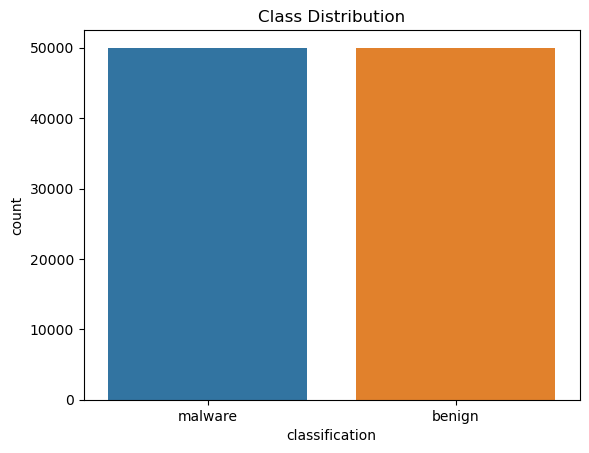

In [4]:
# Perform EDA to understand the distribution of classes and explore relationships between features
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution
sns.countplot(x='classification', data=df)
plt.title('Class Distribution')
plt.show()


### Model Building

In [5]:
# Import necessary classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [1]:
# Import necessary classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [7]:
# Initialize classifiers
classifier1 = DecisionTreeClassifier(random_state=42)

In [8]:
classifier2 = RandomForestClassifier(random_state=42)

In [9]:
classifier3 = SVC(random_state=42)

In [10]:
# Train classifiers
classifier1.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:
classifier2.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
classifier3.fit(X_train, y_train)

SVC(random_state=42)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
# Test classifiers
y_pred1 = classifier1.predict(X_test)

In [21]:
y_pred2 = classifier2.predict(X_test)


In [22]:
y_pred3 = classifier3.predict(X_test)




### Model Evaluation

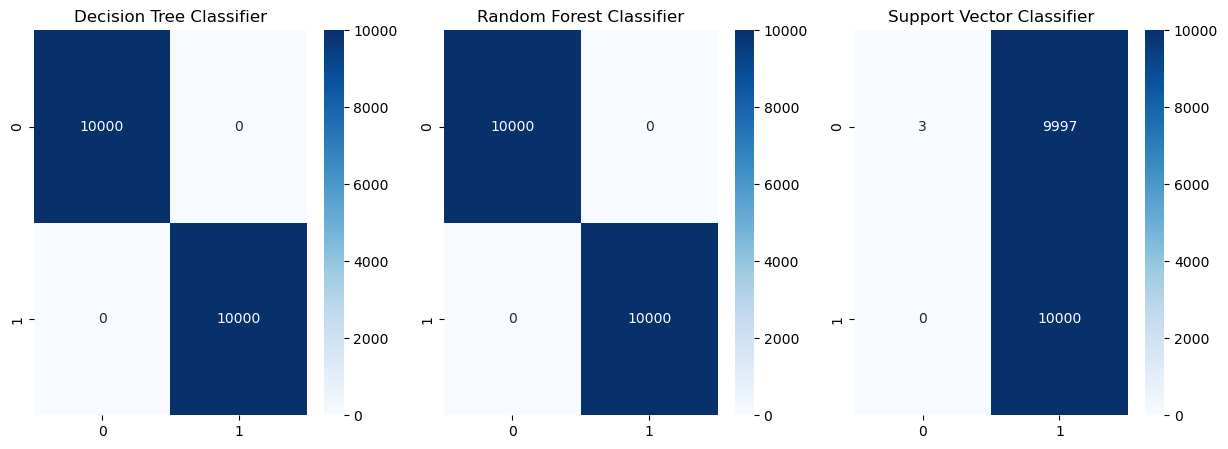

In [23]:
# Generate confusion matrices
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot confusion matrix for classifier 1
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Decision Tree Classifier')

# Plot confusion matrix for classifier 2
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Random Forest Classifier')

# Plot confusion matrix for classifier 3
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Support Vector Classifier')

plt.show()

In [25]:
precision_scores = {
    "Decision Tree Classifier": precision_score(y_test, y_pred1, pos_label='malware'),
    "Random Forest Classifier": precision_score(y_test, y_pred2, pos_label='malware'),
    "Support Vector Classifier": precision_score(y_test, y_pred3, pos_label='malware')
}

recall_scores = {
    "Decision Tree Classifier": recall_score(y_test, y_pred1, pos_label='malware'),
    "Random Forest Classifier": recall_score(y_test, y_pred2, pos_label='malware'),
    "Support Vector Classifier": recall_score(y_test, y_pred3, pos_label='malware')
}

f1_scores = {
    "Decision Tree Classifier": f1_score(y_test, y_pred1, pos_label='malware'),
    "Random Forest Classifier": f1_score(y_test, y_pred2, pos_label='malware'),
    "Support Vector Classifier": f1_score(y_test, y_pred3, pos_label='malware')
}


### Print the scores

In [33]:
print("Accuracy Scores:")
for classifier, score in accuracy_scores.items():
    print(f"{classifier}: {score}")

print("\nPrecision Scores:")
for classifier, score in precision_scores.items():
    print(f"{classifier}: {score}")

print("\nRecall Scores:")
for classifier, score in recall_scores.items():
    print(f"{classifier}: {score}")

print("\nF1 Scores:")
for classifier, score in f1_scores.items():
    print(f"{classifier}: {score}")



Accuracy Scores:
Decision Tree Classifier: 1.0
Random Forest Classifier: 1.0
Support Vector Classifier: 0.50015

Precision Scores:
Decision Tree Classifier: 1.0
Random Forest Classifier: 1.0
Support Vector Classifier: 0.5000750112516877

Recall Scores:
Decision Tree Classifier: 1.0
Random Forest Classifier: 1.0
Support Vector Classifier: 1.0

F1 Scores:
Decision Tree Classifier: 1.0
Random Forest Classifier: 1.0
Support Vector Classifier: 0.6667333400006666
